In [ ]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Dados

In [ ]:
path = kagglehub.dataset_download("muratkokludataset/pumpkin-seeds-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'pumpkin-seeds-dataset' dataset.
Path to dataset files: /kaggle/input/pumpkin-seeds-dataset


In [ ]:
sub_dir = os.listdir(path)[0]
actual_data_path = os.path.join(path, sub_dir)

files_in_sub_dir = os.listdir(actual_data_path)
excel_files = [f for f in files_in_sub_dir if f.endswith('.xlsx')]

if not excel_files:
    raise FileNotFoundError(f"Nenhum arquivo .xlsx encontrado em {actual_data_path}")

excel_file_name = excel_files[0]
full_path = os.path.join(actual_data_path, excel_file_name)

In [ ]:
df = pd.read_excel(full_path)

print(f"Arquivo carregado: {excel_file_name}")
display(df.head())

Arquivo carregado: Pumpkin_Seeds_Dataset.xlsx


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


## Análise Exploratória de Dados

In [ ]:
print("\n--- Informações do Dataset ---")
print(df.info())


--- Informações do Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB
None


In [ ]:
print("\n--- Verificação de Nulos ---")
print(df.isnull().sum())



--- Verificação de Nulos ---
Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64


In [ ]:
display(df.describe())

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


## Normalização dos Dados

In [ ]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = df.columns[:-1]
scaler = MinMaxScaler()

df_normalized = df.copy()
df_normalized[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("DataFrame com colunas numéricas normalizadas:")
display(df_normalized.head())

DataFrame com colunas numéricas normalizadas:


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,0.094060,0.028593,0.015551,0.443011,0.094037,0.121346,0.538377,0.944591,0.766869,0.887532,0.166458,0.755304,Çerçevelik
1,0.323710,0.288960,0.282492,0.534065,0.321202,0.384261,0.735526,0.963061,0.683352,0.751688,0.316881,0.546062,Çerçevelik
2,0.267208,0.310438,0.337143,0.383178,0.269913,0.323187,0.839474,0.885224,0.752212,0.552727,0.459187,0.383900,Çerçevelik
3,0.208936,0.178831,0.178027,0.457938,0.208314,0.257917,0.702193,0.944591,0.751106,0.763636,0.283560,0.585876,Çerçevelik
4,0.204975,0.187652,0.184843,0.444415,0.208303,0.253390,0.716228,0.875989,0.573009,0.725195,0.296938,0.566405,Çerçevelik


## Preparar os dados para o KNN



In [ ]:
from sklearn.model_selection import train_test_split


X = df_normalized.drop('Class', axis=1)
y = df_normalized['Class']

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X: (2500, 12)
Shape of y: (2500,)

Shape of X_train: (1750, 12)
Shape of y_train: (1750,)
Shape of X_val: (375, 12)
Shape of y_val: (375,)
Shape of X_test: (375, 12)
Shape of y_test: (375,)


In [ ]:
import kagglehub
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

path = kagglehub.dataset_download("muratkokludataset/pumpkin-seeds-dataset")

sub_dir = os.listdir(path)[0]
actual_data_path = os.path.join(path, sub_dir)

files_in_sub_dir = os.listdir(actual_data_path)
excel_files = [f for f in files_in_sub_dir if f.endswith('.xlsx')]

if not excel_files:
    raise FileNotFoundError(f"Nenhum arquivo .xlsx encontrado em {actual_data_path}")

excel_file_name = excel_files[0]
full_path = os.path.join(actual_data_path, excel_file_name)

df = pd.read_excel(full_path)

numerical_cols = df.columns[:-1]
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[numerical_cols] = scaler.fit_transform(df[numerical_cols])

X = df_normalized.drop('Class', axis=1)
y = df_normalized['Class']

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Using Colab cache for faster access to the 'pumpkin-seeds-dataset' dataset.
Shape of X: (2500, 12)
Shape of y: (2500,)

Shape of X_train: (1750, 12)
Shape of y_train: (1750,)
Shape of X_val: (375, 12)
Shape of y_val: (375,)
Shape of X_test: (375, 12)
Shape of y_test: (375,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

print("Modelo KNN treinado com sucesso!")

Modelo KNN treinado com sucesso!


In [ ]:
from sklearn.metrics import accuracy_score

y_val_pred = knn_model.predict(X_val)
accuracy_val = accuracy_score(y_val, y_val_pred)

print(f"Acurácia do modelo KNN no conjunto de validação: {accuracy_val:.4f}")

Acurácia do modelo KNN no conjunto de validação: 0.8693


In [ ]:
from sklearn.metrics import accuracy_score


y_test_pred = knn_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"Acurácia do modelo KNN no conjunto de teste: {accuracy_test:.4f}")

Acurácia do modelo KNN no conjunto de teste: 0.8480


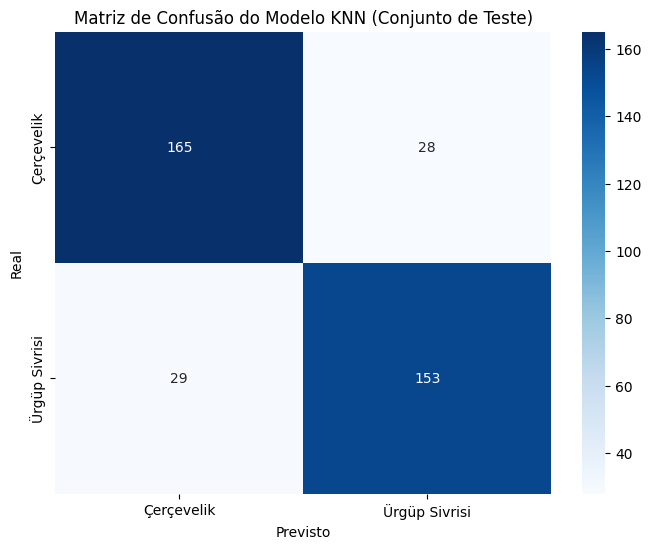

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_test_pred)
class_names = y.unique()

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusão do Modelo KNN (Conjunto de Teste)')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_test_pred, target_names=class_names)

print("\n--- Relatório de Classificação do Modelo KNN (Conjunto de Teste) ---")
print(report)


--- Relatório de Classificação do Modelo KNN (Conjunto de Teste) ---
               precision    recall  f1-score   support

   Çerçevelik       0.85      0.85      0.85       193
Ürgüp Sivrisi       0.85      0.84      0.84       182

     accuracy                           0.85       375
    macro avg       0.85      0.85      0.85       375
 weighted avg       0.85      0.85      0.85       375

